In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
synthetic = pd.read_csv('../results/results_henao/synthetic_1580965994.csv')
synthetic = synthetic.rename(columns=lambda x: x.strip())

In [23]:
mimic = pd.read_csv('../results/results_henao/mimic_1580877802.csv')
mimic = mimic.iloc[np.array(range(0, 20, 2)), :]
mimic = mimic.rename(columns=lambda x: x.strip())

In [24]:
reddit = pd.read_csv('../results/results_henao/reddit_1580933275.csv')
reddit = reddit.iloc[np.array(range(0, 20, 2)), :]
reddit = reddit.rename(columns=lambda x: x.strip())

In [25]:
synthetic_baselines = pd.read_csv('../results/results_henao/synthetic_baselines_1580966689.csv')
synthetic_baselines = synthetic_baselines.rename(columns=lambda x: x.strip())

In [50]:
reddit.columns

Index(['status', 'fpr', 'n_samples', 'gs_temperature', 'hidden_layer_size',
       'estimator', 'censoring_factor', 'n_iter', 'final_train_nll',
       'final_val_nll', 'mean_auc', 'auc0', 'auc1', 'auc2', 'auc3', 'auc4',
       'auc5', 'auc6', 'auc7', 'auc8', 'mean_raem', 'raem0', 'raem1', 'raem2',
       'raem3', 'raem4', 'raem5', 'raem6', 'raem7', 'raem8', 'mean_raea',
       'raea0', 'raea1', 'raea2', 'raea3', 'raea4', 'raea5', 'raea6', 'raea7',
       'raea8', 'mean_ci', 'ci0', 'ci1', 'ci2', 'ci3', 'ci4', 'ci5', 'ci6',
       'ci7', 'ci8'],
      dtype='object')

In [26]:
mimic_baselines = pd.read_csv('../results/results_rapidshare/mimic_baselines_1580932980.csv')[:30]
mimic_baselines = mimic_baselines.rename(columns=lambda x: x.strip())

In [27]:
reddit_baselines = pd.read_csv('../results/results_rapidshare/reddit_baselines_1580932800.csv')[:30]
reddit_baselines = reddit_baselines.rename(columns=lambda x: x.strip())

In [58]:
def stack_metric(df, metric, num, model, dataset):
    dfs = df[['%s%i' % (metric, i) for i in range(num)]].stack().reset_index()[['level_1', 0]]
    dfs.columns = ['task', metric]
    dfs[metric] = dfs[metric].astype(float)
    dfs['model'] = model
    dfs['dataset'] = dataset
    return dfs

In [29]:
import seaborn as sns

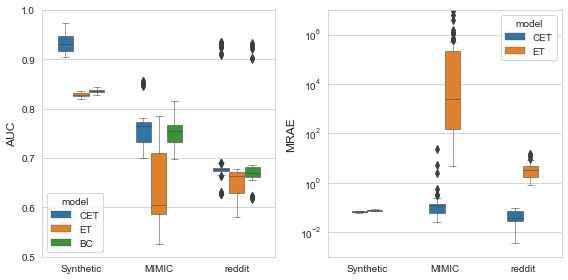

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.set_style("whitegrid")

data = pd.concat([stack_metric(synthetic, 'auc', 2, 'CET', 'Synthetic'),
                  stack_metric(synthetic_baselines[synthetic_baselines['model_type'] == ' survival'], 'auc', 2, 'ET', 'Synthetic'),
                  stack_metric(synthetic_baselines[synthetic_baselines['model_type'] == ' s_mlp'], 'auc', 2, 'BC', 'Synthetic'),
                  stack_metric(mimic, 'auc', 10, 'CET', 'MIMIC'),
                  stack_metric(mimic_baselines[mimic_baselines['model_type'] == ' survival'], 'auc', 10, 'ET', 'MIMIC'),
                  stack_metric(mimic_baselines[mimic_baselines['model_type'] == ' s_mlp'], 'auc', 10, 'BC', 'MIMIC'),
                  stack_metric(reddit, 'auc', 9, 'CET', 'reddit'),
                  stack_metric(reddit_baselines[reddit_baselines['model_type'] == ' survival'], 'auc', 9, 'ET', 'reddit'),
                  stack_metric(reddit_baselines[reddit_baselines['model_type'] == ' s_mlp'], 'auc', 9, 'BC', 'reddit')],
                axis=0)

sns.boxplot(x='dataset', y='auc', hue='model', data=data, ax=ax[0], linewidth=0.5, width=.6)
ax[0].set_ylabel('AUC', fontsize=12)
ax[0].set_xlabel('')
ax[0].set_ylim([.5, 1.])

data = pd.concat([stack_metric(synthetic, 'raem', 2, 'CET', 'Synthetic'),
                  stack_metric(synthetic_baselines[synthetic_baselines['model_type'] == ' survival'], 'raem', 2, 'ET', 'Synthetic'),
                  stack_metric(mimic, 'raem', 10, 'CET', 'MIMIC'),
                  stack_metric(mimic_baselines[mimic_baselines['model_type'] == ' survival'], 'raem', 10, 'ET', 'MIMIC'),
                  stack_metric(reddit, 'raem', 9, 'CET', 'reddit'),
                  stack_metric(reddit_baselines[reddit_baselines['model_type'] == ' survival'], 'raem', 9, 'ET', 'reddit')],
                axis=0)

sns.boxplot(x='dataset', y='raem', hue='model', data=data, ax=ax[1], linewidth=0.5, width=.4)
ax[1].set_ylim([1e-3, 1e7])
ax[1].set_yscale('log')
ax[1].set_ylabel('MRAE', fontsize=12)
ax[1].set_xlabel('')
ax[1].set_yticks([1e-2, 1e0, 1e2, 1e4, 1e6])

plt.tight_layout()
plt.savefig('/Users/mme/Downloads/fig3.pdf')
plt.show()

In [56]:
data = pd.concat([stack_metric(synthetic, 'raem', 2, 'CET', 'Synth'),
                  stack_metric(synthetic_baselines[synthetic_baselines['model_type'] == ' survival'], 'raem', 2, 'ET', 'Synth'),
                  stack_metric(mimic, 'raem', 10, 'CET', 'MIMIC'),
                  stack_metric(mimic_baselines[mimic_baselines['model_type'] == ' survival'], 'raem', 10, 'ET', 'MIMIC'),
                  stack_metric(reddit, 'raem', 9, 'CET', 'reddit'),
                  stack_metric(reddit_baselines[reddit_baselines['model_type'] == ' survival'], 'raem', 9, 'ET', 'reddit')],
                axis=0)
data.values

array([['raem0', 0.06939694344755737, 'CET', 'Synth'],
       ['raem1', 0.0665862898529525, 'CET', 'Synth'],
       ['raem0', 0.07210119634483174, 'CET', 'Synth'],
       ...,
       ['raem6', ' 8.414668673434887', 'ET', 'reddit'],
       ['raem7', ' 5.009405593731226', 'ET', 'reddit'],
       ['raem8', ' 12.623601646428542', 'ET', 'reddit']], dtype=object)

In [32]:
stack_metric(mimic_baselines[mimic_baselines['model_type'] == 's_mlp'], 'auc', 10, 'BC', 'M')

,task,auc,model,dataset


In [35]:
mimic_baselines['model_type'].value_counts().index[1]

' survival'